In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from scipy.ndimage import convolve, sobel
from skimage.metrics import structural_similarity as ssim

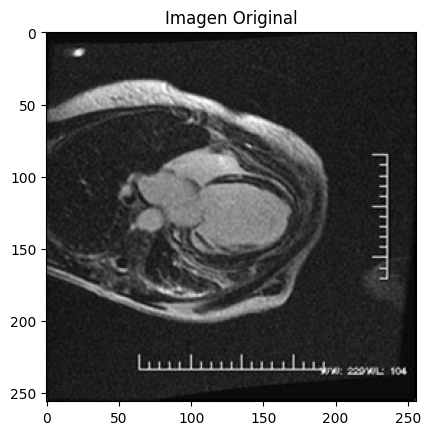

Generación 0, Fitness: 0.32060989606986584


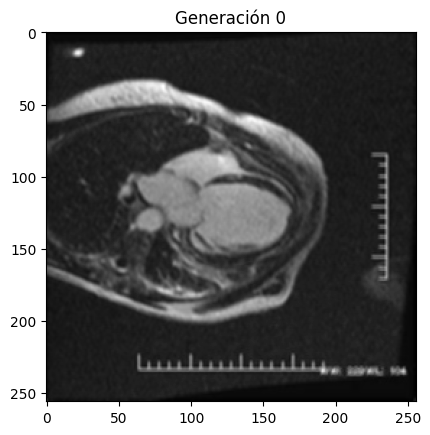

Generación 50, Fitness: 0.9348748754069166


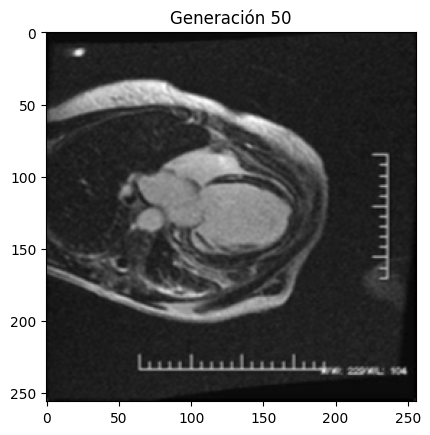

Generación 100, Fitness: 0.9614681630873755


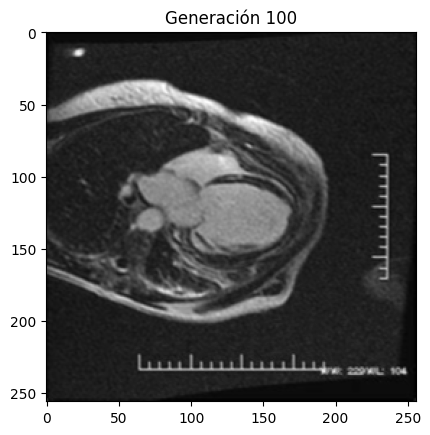

Generación 150, Fitness: 0.971722294415885


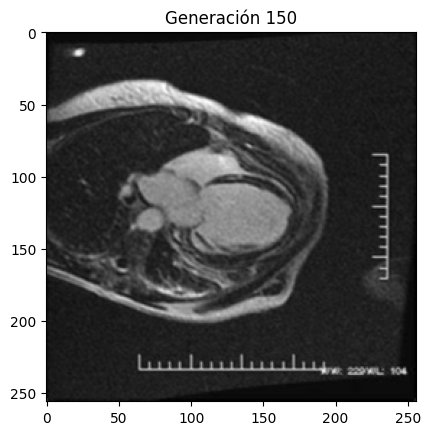

Generación 200, Fitness: 0.9745257335593585


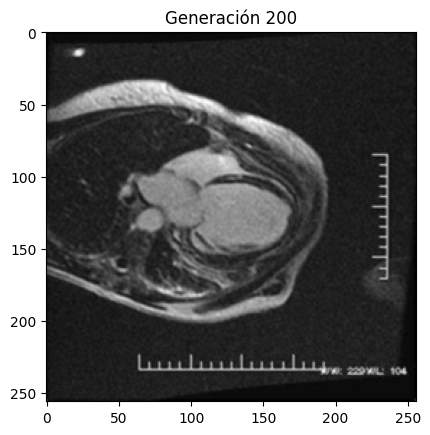

Generación 250, Fitness: 0.9752026208653243


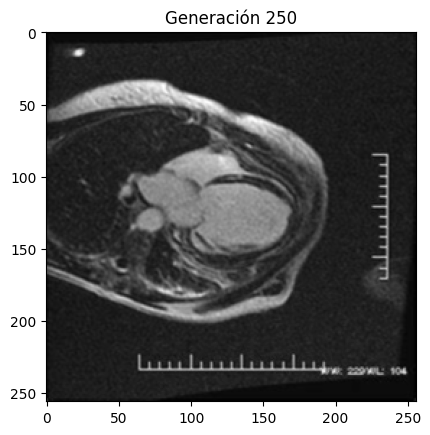

Generación 300, Fitness: 0.9782687538729514


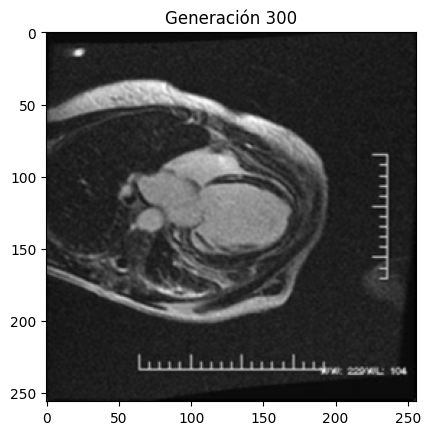

Generación 350, Fitness: 0.9786673937435023


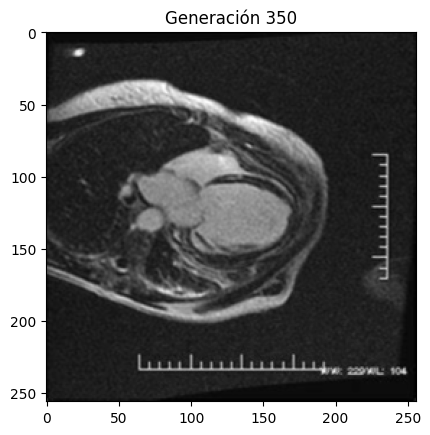

Generación 400, Fitness: 0.9792551299937703


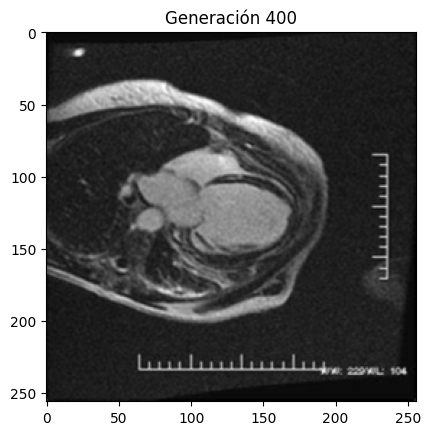

Generación 450, Fitness: 0.9824517008721466


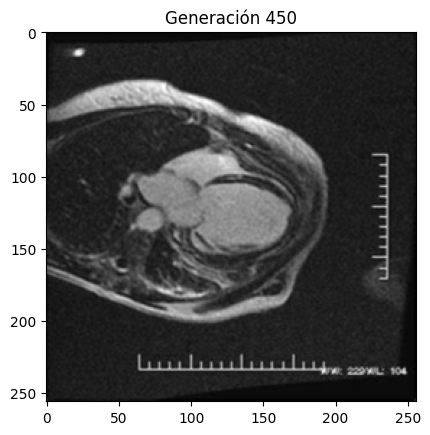

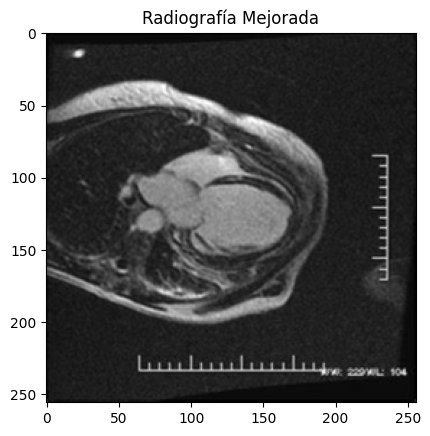

In [2]:
# Parámetros del algoritmo genético
TAMANO_POBLACION = 10
GENERACIONES = 500
TASA_MUTACION = 0.01

# Cargar y preprocesar la imagen médica
radiografia = Image.open("sebas.jpg").convert("L").resize((256, 256))
radiografia = np.array(radiografia) / 255.0
plt.imshow(radiografia, cmap='gray')
plt.title("Imagen Original")
plt.show()


# Función para crear un filtro inicial
def crear_individuo():
    return np.random.uniform(0, 1, (3, 3))


# Función para aplicar un filtro a una imagen
def aplicar_filtro(imagen, filtro):
    return convolve(imagen, filtro)


# Función para calcular el borde usando el filtro Sobel
def calcular_borde(imagen):
    grad_x = sobel(imagen, axis=0)
    grad_y = sobel(imagen, axis=1)
    return np.hypot(grad_x, grad_y)

# Valores Positivos y Negativos:
#
# Un valor positivo en
# grad
# x
#   indica que hay un aumento de intensidad de izquierda a derecha (por ejemplo, de oscuro a claro).
# Un valor negativo en grad x
#
#   indica que hay una disminución de intensidad de izquierda a derecha (por ejemplo, de claro a oscuro).
# Lo mismo aplica para grad y
#  : un valor positivo indica un aumento de intensidad de arriba hacia abajo, y un valor negativo indica una disminución.
# Valores Cercanos a Cero:
#
# Valores cercanos a cero en cualquiera de los gradientes indican que no hay un cambio significativo en la intensidad de los píxeles en esa dirección. Es decir, hay una área de la imagen que es relativamente uniforme o plana en términos de color o brillo.
# Valores Altos:
#
# Valores altos (positivos o negativos) indican un cambio brusco en la intensidad de los píxeles, lo que sugiere la presencia de un borde o una transición notable. En otras palabras, es probable que haya una línea o contorno en esa región de la imagen.
#gradx y grad y son matrices del tamano de la matriz de la imagen que le mande que indican cambios, x seria en la direccion dle ejex y y y en la del eje y
#return np.hypot(grad_x, grad_y)= magnitud = sqrt(grad_x^2 + grad_y^2)=

# Los valores más altos en esta matriz indican áreas donde hay cambios bruscos en la intensidad de la imagen, lo que corresponde a la presencia de un borde.
# Los valores más bajos indican áreas donde no hay cambios significativos en la intensidad, lo que significa que no hay un borde presente.

# Función de fitness con penalización por pérdida de bordes
def fitness(individuo):
    imagen_filtrada = aplicar_filtro(radiografia, individuo)
    ssim_value = ssim(radiografia, imagen_filtrada, data_range=imagen_filtrada.max() - imagen_filtrada.min())

    # Penalización de pérdida de bordes
    bordes_original = calcular_borde(radiografia)
    bordes_filtrados = calcular_borde(imagen_filtrada)
    perdida_bordes = np.mean((bordes_original - bordes_filtrados) ** 2)

    # Fitness: SSIM ajustado por la pérdida de bordes
    return ssim_value - 0.5 * perdida_bordes


# Función de selección
def seleccion(poblacion):
    poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
    return poblacion[:2]


# Función de cruce
def cruce(padre1, padre2):
    hijo = np.copy(padre1)
    mask = np.random.randint(0, 2, (3, 3)).astype(bool)
    hijo[mask] = padre2[mask]
    return hijo


# Función de mutación
def mutacion(individuo):
    mutante = np.copy(individuo)
    for i in range(mutante.shape[0]):
        for j in range(mutante.shape[1]):
            if random.random() < TASA_MUTACION:
                mutante[i, j] = np.random.uniform(0, 1)
    return mutante


# Algoritmo Genético Principal
def algoritmo_genetico():
    # Crear población inicial con filtros aleatorios y filtros base conocidos
    poblacion = [crear_individuo() for _ in range(TAMANO_POBLACION // 2)]
    # poblacion += [np.array([[1, -2, 1], [1, 5, 1], [-1, 2, 1]]),  # Ejemplo de filtro predefinido
    #               np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]]),
    #               np.ones((3, 3)) / 9,  # Filtro promedio
    #               np.eye(3)]  # Filtro identidad para preservación

    for generacion in range(GENERACIONES):
        padres = seleccion(poblacion)
        nueva_poblacion = []

        for _ in range(TAMANO_POBLACION):
            hijo = cruce(*padres)
            hijo = mutacion(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion

        # Imprimir y mostrar la mejor imagen cada 50 generaciones
        if generacion % 50 == 0:
            mejor = seleccion(poblacion)[0]
            print(f"Generación {generacion}, Fitness: {fitness(mejor)}")
            imagen_filtrada = aplicar_filtro(radiografia, mejor)
            plt.imshow(imagen_filtrada, cmap='gray')
            plt.title(f"Generación {generacion}")
            plt.show()

    mejor = seleccion(poblacion)[0]
    return mejor


# Ejecutar el algoritmo genético
mejor_filtro = algoritmo_genetico()

# Aplicar el mejor filtro a la imagen original y mostrarla
imagen_final = aplicar_filtro(radiografia, mejor_filtro)
plt.imshow(imagen_final, cmap='gray')
plt.title("Radiografía Mejorada")
plt.show()

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import convolve, sobel
from skimage.metrics import structural_similarity as ssim

# Parámetros del algoritmo genético
TAMANO_POBLACION = 10
GENERACIONES = 500
TASA_MUTACION = 0.1
PROBABILIDAD_CRUCE = 0.85
NUM_PADRES = 4  # Número de padres que seleccionaremos
TOUR_SIZE = 3   # Tamaño para selección por torneo

# Cargar y preprocesar la imagen médica
radiografia = Image.open("sebas.jpg").convert("L").resize((256, 256))
radiografia = np.array(radiografia) / 255.0

# Función para crear un filtro inicial
def crear_individuo():
    return np.random.uniform(0, 1, (3, 3))

# Función para aplicar un filtro a una imagen
def aplicar_filtro(imagen, filtro):
    return convolve(imagen, filtro)

# Función para calcular el borde usando el filtro Sobel
def calcular_borde(imagen):
    grad_x = sobel(imagen, axis=0)
    grad_y = sobel(imagen, axis=1)
    return np.hypot(grad_x, grad_y)

# Función de fitness con penalización por pérdida de bordes
def fitness(individuo):
    imagen_filtrada = aplicar_filtro(radiografia, individuo)
    ssim_value = ssim(radiografia, imagen_filtrada, data_range=imagen_filtrada.max() - imagen_filtrada.min())
    bordes_original = calcular_borde(radiografia)
    bordes_filtrados = calcular_borde(imagen_filtrada)
    perdida_bordes = np.mean((bordes_original - bordes_filtrados) ** 2)
    return ssim_value - 0.5 * perdida_bordes

#
#def fitness(individuo):
#    imagen_filtrada = aplicar_filtro(radiografia, individuo)
#    # ssim_value = ssim(radiografia, imagen_filtrada, data_range=imagen_filtrada.max() - imagen_filtrada.min())
#    # # psnr_value = psnr(radiografia, imagen_filtrada)
#    mse = np.mean(abs(radiografia - imagen_filtrada))
#    # print(mse)
#    if mse == 0:
#        psnr_value = float('inf')
#    else:
#        MAX = 1.0
#        psnr_value = 10 * np.log10(MAX**2 / mse)
#    return psnr_value
#    # return ssim_value
#
# Métodos de selección
def seleccion(poblacion, method='elite'):
    if method == 'elite':
        poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
        return poblacion[:NUM_PADRES]
    
    elif method == 'ruleta':
        total_fitness = sum(fitness(ind) for ind in poblacion)
        selection_probs = [fitness(ind) / total_fitness for ind in poblacion]
        return random.choices(poblacion, weights=selection_probs, k=NUM_PADRES)
    
    elif method == 'aptitud':
        poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
        top_half = poblacion[:len(poblacion) // 2]
        return random.sample(top_half, k=NUM_PADRES)
    
    elif method == 'muestreo_estocastico':
        total_fitness = sum(fitness(ind) for ind in poblacion)
        selection_probs = [fitness(ind) / total_fitness for ind in poblacion]
        distance = 1.0 / NUM_PADRES
        start_point = random.uniform(0, distance)
        points = [start_point + i * distance for i in range(NUM_PADRES)]
        selected = []
        cumulative_prob = 0
        j = 0
        for ind, prob in zip(poblacion, selection_probs):
            cumulative_prob += prob
            while j < NUM_PADRES and cumulative_prob > points[j]:
                selected.append(ind)
                j += 1
        return selected

    elif method == 'torneo':
        selected = []
        for _ in range(NUM_PADRES):
            tournament = random.sample(poblacion, TOUR_SIZE)
            winner = max(tournament, key=fitness)
            selected.append(winner)
        return selected
    
    elif method == 'rango':
        poblacion = sorted(poblacion, key=lambda ind: fitness(ind))
        rank_weights = [i + 1 for i in range(len(poblacion))]
        total_weight = sum(rank_weights)
        selection_probs = [weight / total_weight for weight in rank_weights]
        return random.choices(poblacion, weights=selection_probs, k=NUM_PADRES)

# Métodos de cruce
def crossover(parent1, parent2, method='uniforme'):
    if method == 'uniforme':
        mask = np.random.randint(0, 2, (3, 3)).astype(bool)
        child = np.copy(parent1)
        child[mask] = parent2[mask]
    elif method == 'un_punto':
        punto = random.randint(1, 2)
        child = np.copy(parent1)
        child[:punto, :] = parent2[:punto, :]
    elif method == 'dos_puntos':
        punto1, punto2 = sorted(random.sample(range(3), 2))
        child = np.copy(parent1)
        child[punto1:punto2, :] = parent2[punto1:punto2, :]
    elif method == 'punto_medio':
        child = np.copy(parent1)
        child[1, :] = parent2[1, :]
    return child

# Métodos de mutación
def mutacion(individuo, method='simple'):
    mutante = np.copy(individuo)
    if method == 'simple':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] = np.random.uniform(0, 1)
    elif method == 'swap':
        i1, j1, i2, j2 = random.sample(range(3), 4)
        mutante[i1, j1], mutante[i2, j2] = mutante[i2, j2], mutante[i1, j1]
    elif method == 'crecimiento':
        for i in range(3):
            for j in range(3):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] *= np.random.uniform(0.8, 1.2)
                    mutante[i, j] = max(0, min(1, mutante[i, j]))
    elif method == 'reduccion':
        for i in range(3):
            for j in range(3):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] -= np.random.uniform(0, 0.5)
                    mutante[i, j] = max(0, mutante[i, j])
    return mutante

# Algoritmo Genético Principal
def algoritmo_genetico(selection_method='elite', crossover_method='uniforme', mutation_method='simple'):
    poblacion = [crear_individuo() for _ in range(TAMANO_POBLACION)]
    for generacion in range(GENERACIONES):
        padres = seleccion(poblacion, method=selection_method)
        nueva_poblacion = []
        for _ in range(TAMANO_POBLACION // len(padres)):
            for i in range(0, len(padres), 2):
                if random.random() < PROBABILIDAD_CRUCE:
                    child1 = mutacion(crossover(padres[i], padres[i+1], method=crossover_method), method=mutation_method)
                    child2 = mutacion(crossover(padres[i], padres[i+1], method=crossover_method), method=mutation_method)
                else:
                    child1 = mutacion(padres[i], method=mutation_method)
                    child2 = mutacion(padres[i+1], method=mutation_method)
                nueva_poblacion.extend([child1, child2])
        poblacion = nueva_poblacion
        # Monitorear progreso
        if generacion % 50 == 0:
            mejor = max(poblacion, key=fitness)
            print(f"Generación {generacion}, Fitness: {fitness(mejor)}")
            #imagen_filtrada = aplicar_filtro(radiografia, mejor)
            #plt.imshow(imagen_filtrada, cmap='gray')
            #plt.title(f"Generación {generacion}")
            #plt.show()
    mejor = max(poblacion, key=fitness)
    return mejor

# Ejecutar el algoritmo genético
mejor_filtro = algoritmo_genetico(selection_method='torneo', crossover_method='dos_puntos', mutation_method='crecimiento')


imagen_final = aplicar_filtro(radiografia, mejor_filtro)
plt.imshow(imagen_final, cmap='gray')
plt.title("Radiografía Mejorada")
plt.show()

# Aplicar el mejor filtro a la imagen original y mostrarla
imagen_final = aplicar_filtro(radiografia, mejor_filtro)
plt.imshow(imagen_final, cmap='gray')
plt.title("Radiografía Mejorada")
plt.show()


Generación 0, Fitness: 10.601318185600954
Generación 50, Fitness: 10.99819760579029
Generación 100, Fitness: 11.180230534598763
Generación 150, Fitness: 11.351834663157089
Generación 200, Fitness: 11.439293780311191
Generación 250, Fitness: 11.586183550149112
Generación 300, Fitness: 11.921388901519274
Generación 350, Fitness: 12.617317017053079
Generación 400, Fitness: 12.898899074550167
Generación 450, Fitness: 13.136241933034219


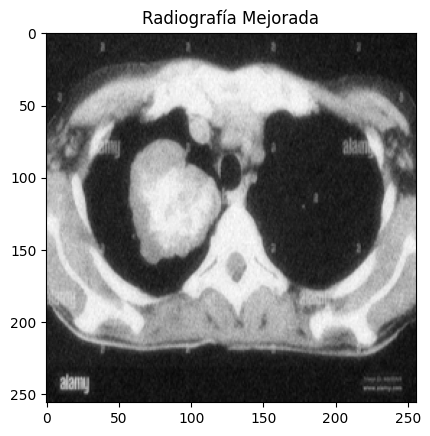

Imagen final guardada como 'torax_frontal_mejorada'


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from scipy.ndimage import convolve, sobel
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

TAMANO_POBLACION = 100
GENERACIONES = 500
TASA_MUTACION = 0.01
NUM_PADRES = 2  # Número de padres que seleccionaremos
TOUR_SIZE = 2   # Tamaño para selección por torneo

STYLE = 'sebas'

radiografia = Image.open("high_noisy_image.jpg").convert("L")
WIDTH, HEIGTH = radiografia.size
radiografia = radiografia.resize((256, 256))
radiografia = np.array(radiografia) / 255.0
#plt.imshow(radiografia, cmap='gray')
#plt.show()

# Función para crear un filtro inicial
def crear_individuo():
    if STYLE == 'sebas':
        return np.random.uniform(0, 1, (10, 10))
    elif STYLE == 'noni':
        return np.random.uniform(0, 1, (3, 3))

# Función para aplicar un filtro a una imagen
def aplicar_filtro(imagen, filtro):
    if STYLE == 'noni':
        return convolve(imagen, filtro)
    elif STYLE == 'sebas':
        imagen_filtrada = convolve(imagen, filtro)
        imagen_filtrada = (imagen_filtrada - imagen_filtrada.min()) / (imagen_filtrada.max() - imagen_filtrada.min())
        return imagen_filtrada

def calcular_borde(imagen):
    grad_x = sobel(imagen, axis=0)
    grad_y = sobel(imagen, axis=1)
    return np.hypot(grad_x, grad_y)

# Función de fitness con PSNR
def fitness(individuo):
    if STYLE == 'noni':
        imagen_filtrada = aplicar_filtro(radiografia, individuo)
        ssim_value = ssim(radiografia, imagen_filtrada, data_range=imagen_filtrada.max() - imagen_filtrada.min())
        bordes_original = calcular_borde(radiografia)
        bordes_filtrados = calcular_borde(imagen_filtrada)
        perdida_bordes = np.mean((bordes_original - bordes_filtrados) ** 2)
        return ssim_value - 0.5 * perdida_bordes
    elif STYLE == 'sebas':
        imagen_filtrada = aplicar_filtro(radiografia, individuo)
        mse = np.mean(abs(radiografia - imagen_filtrada))
        if mse == 0:
            psnr_value = float('inf')
        else:
            MAX = 1.0
            psnr_value = 10 * np.log10(MAX**2 / mse)
        return psnr_value

# Métodos de selección
def seleccion(poblacion, method='elite'):
    if method == 'elite':
        poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
        return poblacion[:NUM_PADRES]
    elif method == 'ruleta':
        total_fitness = sum(fitness(ind) for ind in poblacion)
        selection_probs = [fitness(ind) / total_fitness for ind in poblacion]
        return random.choices(poblacion, weights=selection_probs, k=NUM_PADRES)
    elif method == 'aptitud':
        poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
        top_half = poblacion[:len(poblacion) // 2]
        return random.sample(top_half, k=NUM_PADRES)
    elif method == 'muestreo_estocastico':
        total_fitness = sum(fitness(ind) for ind in poblacion)
        selection_probs = [fitness(ind) / total_fitness for ind in poblacion]
        distance = 1.0 / NUM_PADRES
        start_point = random.uniform(0, distance)
        points = [start_point + i * distance for i in range(NUM_PADRES)]
        selected = []
        cumulative_prob = 0
        j = 0
        for ind, prob in zip(poblacion, selection_probs):
            cumulative_prob += prob
            while j < NUM_PADRES and cumulative_prob > points[j]:
                selected.append(ind)
                j += 1
        return selected
    elif method == 'torneo':
        selected = []
        for _ in range(NUM_PADRES):
            tournament = random.sample(poblacion, TOUR_SIZE)
            winner = max(tournament, key=fitness)
            selected.append(winner)
        return selected
    elif method == 'rango':
        poblacion = sorted(poblacion, key=lambda ind: fitness(ind))
        rank_weights = [i + 1 for i in range(len(poblacion))]
        total_weight = sum(rank_weights)
        selection_probs = [weight / total_weight for weight in rank_weights]
        return random.choices(poblacion, weights=selection_probs, k=NUM_PADRES)
    
# Función de cruce
def cruce(padre1, padre2, method='uniforme'):
    size = (10, 10) if STYLE == 'sebas' else (3, 3)
    hijo = np.copy(padre1)
    if method == 'uniforme':
        mask = np.random.randint(0, 2, size).astype(bool)
        hijo[mask] = padre2[mask]
    elif method == 'un_punto':
        punto = random.randint(1, size[0] - 1)
        hijo[:punto, :] = padre2[:punto, :]
    elif method == 'dos_puntos':
        punto1, punto2 = sorted(random.sample(range(size[0]), 2))
        hijo[punto1:punto2, :] = padre2[punto1:punto2, :]
    elif method == 'punto_medio':
        hijo[:size[0] // 2, :] = padre1[:size[0] // 2, :]
        hijo[size[0] // 2:, :] = padre2[size[0] // 2:, :]
    
    return hijo

# Función de mutación
def mutacion(individuo, method='simple'):
    mutante = np.copy(individuo)
    if method == 'simple':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] = np.random.uniform(0, 1)
    elif method == 'swap':
        i1, j1, i2, j2 = random.sample(range(mutante.shape[0]), 2) + random.sample(range(mutante.shape[1]), 2)
        mutante[i1, j1], mutante[i2, j2] = mutante[i2, j2], mutante[i1, j1]
    elif method == 'crecimiento':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] *= np.random.uniform(0.8, 1.2)
                    mutante[i, j] = max(0, min(1, mutante[i, j]))  # Asegura valores en el rango [0, 1]
    elif method == 'reduccion':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] -= np.random.uniform(0, 0.5)
                    mutante[i, j] = max(0, mutante[i, j])  # Asegura que no caiga por debajo de 0
    return mutante

# Algoritmo Genético Principal
def algoritmo_genetico(selection_method='torneo', crossover_method='uniforme', mutation_method='simple'):
    poblacion = [crear_individuo() for _ in range(TAMANO_POBLACION)]
    for generacion in range(GENERACIONES):
        padres = seleccion(poblacion, method=selection_method)
        nueva_poblacion = []
        for _ in range(TAMANO_POBLACION // len(padres)):
            for i in range(0, len(padres), 2):
                child1 = mutacion(cruce(padres[i], padres[i+1], method=crossover_method), method=mutation_method)
                child2 = mutacion(cruce(padres[i], padres[i+1], method=crossover_method), method=mutation_method)
                nueva_poblacion.extend([child1, child2])
        poblacion = nueva_poblacion

        if generacion % 50 == 0:
            mejor = max(poblacion, key=fitness)
            print(f"Generación {generacion}, Fitness: {fitness(mejor)}")

    mejor = max(poblacion, key=fitness)
    return mejor

# Ejecutar el AG
mejor_filtro = algoritmo_genetico(selection_method='elite', crossover_method='uniforme', mutation_method='simple')
# CONFIGURACION POR DEFECTO PARA SEBAS ES ELITE, UNIFORME, TASA DE MUTACION = 0.01, POBLACION = 100 GENERACIONES = 500, metodo de mutacion es simple, 2 padres
# CONFIGRUACION PARA NONI ES TORNEO, DOS PUNTOS, CRECIMENTO, TASA DE MUTACION = 0.1, NUM PADRES = 4, TAM TORNEO = 4

# Aplicar el mejor filtro a la imagen original y mostrarla
imagen_final = aplicar_filtro(radiografia, mejor_filtro)
plt.imshow(imagen_final, cmap='gray')
plt.title("Radiografía Mejorada")
plt.show()

# Guardar la imagen final
imagen_final_pil = Image.fromarray((imagen_final * 255).astype(np.uint8))
imagen_final_pil = imagen_final_pil.resize((WIDTH, HEIGTH))
imagen_final_pil.save("torax_frontal_mejorada.jpg")
print("Imagen final guardada como 'torax_frontal_mejorada'")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from scipy.ndimage import convolve, sobel
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr




TAMANO_POBLACION = 100
GENERACIONES = 500
TASA_MUTACION = 0.01
NUM_PADRES = 2  
TOUR_SIZE = 2   

STYLE = 'sebas'

radiografia = Image.open("high_noisy_image.jpg").convert("L")
WIDTH, HEIGTH = radiografia.size
radiografia = radiografia.resize((256, 256))
radiografia = np.array(radiografia) / 255.0
#plt.imshow(radiografia, cmap='gray')
#plt.show()

# Función para crear un filtro inicial
def crear_individuo():
    if STYLE == 'sebas':
        return np.random.uniform(0, 1, (10, 10))
    elif STYLE == 'noni':
        return np.random.uniform(0, 1, (3, 3))

# Función para aplicar un filtro a una imagen
def aplicar_filtro(imagen, filtro):
    if STYLE == 'noni':
        return convolve(imagen, filtro)
    elif STYLE == 'sebas':
        imagen_filtrada = convolve(imagen, filtro)
        imagen_filtrada = (imagen_filtrada - imagen_filtrada.min()) / (imagen_filtrada.max() - imagen_filtrada.min())
        return imagen_filtrada

def calcular_borde(imagen):
    grad_x = sobel(imagen, axis=0)
    grad_y = sobel(imagen, axis=1)
    return np.hypot(grad_x, grad_y)

# Función de fitness con PSNR
def fitness(individuo):
    if STYLE == 'noni':
        imagen_filtrada = aplicar_filtro(radiografia, individuo)
        ssim_value = ssim(radiografia, imagen_filtrada, data_range=imagen_filtrada.max() - imagen_filtrada.min())
        bordes_original = calcular_borde(radiografia)
        bordes_filtrados = calcular_borde(imagen_filtrada)
        perdida_bordes = np.mean((bordes_original - bordes_filtrados) ** 2)
        return ssim_value - 0.5 * perdida_bordes
    elif STYLE == 'sebas':
        imagen_filtrada = aplicar_filtro(radiografia, individuo)
        mse = np.mean(abs(radiografia - imagen_filtrada))
        if mse == 0:
            psnr_value = float('inf')
        else:
            MAX = 1.0
            psnr_value = 10 * np.log10(MAX**2 / mse)
        return psnr_value

# Métodos de selección
def seleccion(poblacion, method='elite'):
    if method == 'elite':
        poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
        return poblacion[:NUM_PADRES]
    elif method == 'ruleta':
        total_fitness = sum(fitness(ind) for ind in poblacion)
        selection_probs = [fitness(ind) / total_fitness for ind in poblacion]
        return random.choices(poblacion, weights=selection_probs, k=NUM_PADRES)
    elif method == 'aptitud':
        poblacion = sorted(poblacion, key=lambda x: fitness(x), reverse=True)
        top_half = poblacion[:len(poblacion) // 2]
        return random.sample(top_half, k=NUM_PADRES)
    elif method == 'muestreo_estocastico':
        total_fitness = sum(fitness(ind) for ind in poblacion)
        selection_probs = [fitness(ind) / total_fitness for ind in poblacion]
        distance = 1.0 / NUM_PADRES
        start_point = random.uniform(0, distance)
        points = [start_point + i * distance for i in range(NUM_PADRES)]
        selected = []
        cumulative_prob = 0
        j = 0
        for ind, prob in zip(poblacion, selection_probs):
            cumulative_prob += prob
            while j < NUM_PADRES and cumulative_prob > points[j]:
                selected.append(ind)
                j += 1
        return selected
    elif method == 'torneo':
        selected = []
        for _ in range(NUM_PADRES):
            tournament = random.sample(poblacion, TOUR_SIZE)
            winner = max(tournament, key=fitness)
            selected.append(winner)
        return selected
    elif method == 'rango':
        poblacion = sorted(poblacion, key=lambda ind: fitness(ind))
        rank_weights = [i + 1 for i in range(len(poblacion))]
        total_weight = sum(rank_weights)
        selection_probs = [weight / total_weight for weight in rank_weights]
        return random.choices(poblacion, weights=selection_probs, k=NUM_PADRES)
    
# Función de cruce
def cruce(padre1, padre2, method='uniforme'):
    size = (10, 10) if STYLE == 'sebas' else (3, 3)
    hijo = np.copy(padre1)
    if method == 'uniforme':
        mask = np.random.randint(0, 2, size).astype(bool)
        hijo[mask] = padre2[mask]
    elif method == 'un_punto':
        punto = random.randint(1, size[0] - 1)
        hijo[:punto, :] = padre2[:punto, :]
    elif method == 'dos_puntos':
        punto1, punto2 = sorted(random.sample(range(size[0]), 2))
        hijo[punto1:punto2, :] = padre2[punto1:punto2, :]
    elif method == 'punto_medio':
        hijo[:size[0] // 2, :] = padre1[:size[0] // 2, :]
        hijo[size[0] // 2:, :] = padre2[size[0] // 2:, :]
    
    return hijo

# Función de mutación
def mutacion(individuo, method='simple'):
    mutante = np.copy(individuo)
    if method == 'simple':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] = np.random.uniform(0, 1)
    elif method == 'swap':
        i1, j1, i2, j2 = random.sample(range(mutante.shape[0]), 2) + random.sample(range(mutante.shape[1]), 2)
        mutante[i1, j1], mutante[i2, j2] = mutante[i2, j2], mutante[i1, j1]
    elif method == 'crecimiento':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] *= np.random.uniform(0.8, 1.2)
                    mutante[i, j] = max(0, min(1, mutante[i, j]))  # Asegura valores en el rango [0, 1]
    elif method == 'reduccion':
        for i in range(mutante.shape[0]):
            for j in range(mutante.shape[1]):
                if random.random() < TASA_MUTACION:
                    mutante[i, j] -= np.random.uniform(0, 0.5)
                    mutante[i, j] = max(0, mutante[i, j])  # Asegura que no caiga por debajo de 0
    return mutante

# Algoritmo Genético Principal
def algoritmo_genetico(selection_method='torneo', crossover_method='uniforme', mutation_method='simple'):
    poblacion = [crear_individuo() for _ in range(TAMANO_POBLACION)]
    for generacion in range(GENERACIONES):
        padres = seleccion(poblacion, method=selection_method)
        nueva_poblacion = []
        for _ in range(TAMANO_POBLACION // len(padres)):
            for i in range(0, len(padres), 2):
                child1 = mutacion(cruce(padres[i], padres[i+1], method=crossover_method), method=mutation_method)
                child2 = mutacion(cruce(padres[i], padres[i+1], method=crossover_method), method=mutation_method)
                nueva_poblacion.extend([child1, child2])
        poblacion = nueva_poblacion

        if generacion % 50 == 0:
            mejor = max(poblacion, key=fitness)
            print(f"Generación {generacion}, Fitness: {fitness(mejor)}")

    mejor = max(poblacion, key=fitness)
    return mejor

# Ejecutar el AG
mejor_filtro = algoritmo_genetico(selection_method='elite', crossover_method='uniforme', mutation_method='simple')
# CONFIGURACION POR DEFECTO PARA SEBAS ES ELITE, UNIFORME, TASA DE MUTACION = 0.01, POBLACION = 100 GENERACIONES = 500, metodo de mutacion es simple, 2 padres
# CONFIGRUACION PARA NONI ES TORNEO, DOS PUNTOS, CRECIMENTO, TASA DE MUTACION = 0.1, NUM PADRES = 4, TAM TORNEO = 4

# Aplicar el mejor filtro a la imagen original y mostrarla
imagen_final = aplicar_filtro(radiografia, mejor_filtro)
plt.imshow(imagen_final, cmap='gray')
plt.title("Radiografía Mejorada")
plt.show()

# Guardar la imagen final
imagen_final_pil = Image.fromarray((imagen_final * 255).astype(np.uint8))
imagen_final_pil = imagen_final_pil.resize((WIDTH, HEIGTH))
imagen_final_pil.save("torax_frontal_mejorada.jpg")
print("Imagen final guardada como 'torax_frontal_mejorada'")
